In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.chdir("E:\DataScience\Python\Data\ProjectData\CustomerChurn")

In [3]:
telcom = pd.read_csv('CustomerChurn.csv')
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [5]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Here we can see the TotalCharges is an object variable. Let's change it to float

In [6]:
#telcom['TotalCharges'].isnull().sum()
#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

In [7]:
#Converting to Numeric Value
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

In [8]:
telcom['TotalCharges'].isnull().sum()

11

In [9]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [10]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

In [11]:
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [12]:
telcom['SeniorCitizen'].head()

0    No
1    No
2    No
3    No
4    No
Name: SeniorCitizen, dtype: object

In [13]:
#Replacing 0 with null values in tenure column
telcom['tenure'] = telcom["tenure"].replace(0,np.nan)

In [14]:
telcom['tenure'].isnull().sum()

11

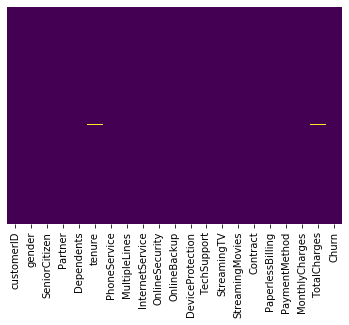

In [15]:
sns.heatmap(telcom.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
#replace values
telcom["Churn"] = telcom["Churn"].replace({"Yes":1,"No":0})

In [17]:
telcom['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [18]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7032 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(3), int64(1), 

In [19]:
telcom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              11
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

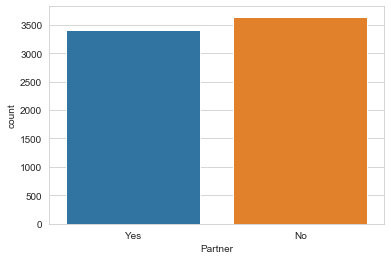

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Partner',data=telcom)

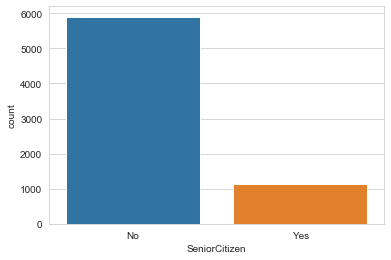

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='SeniorCitizen',data=telcom)

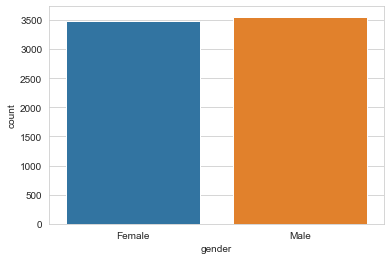

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='gender',data=telcom)

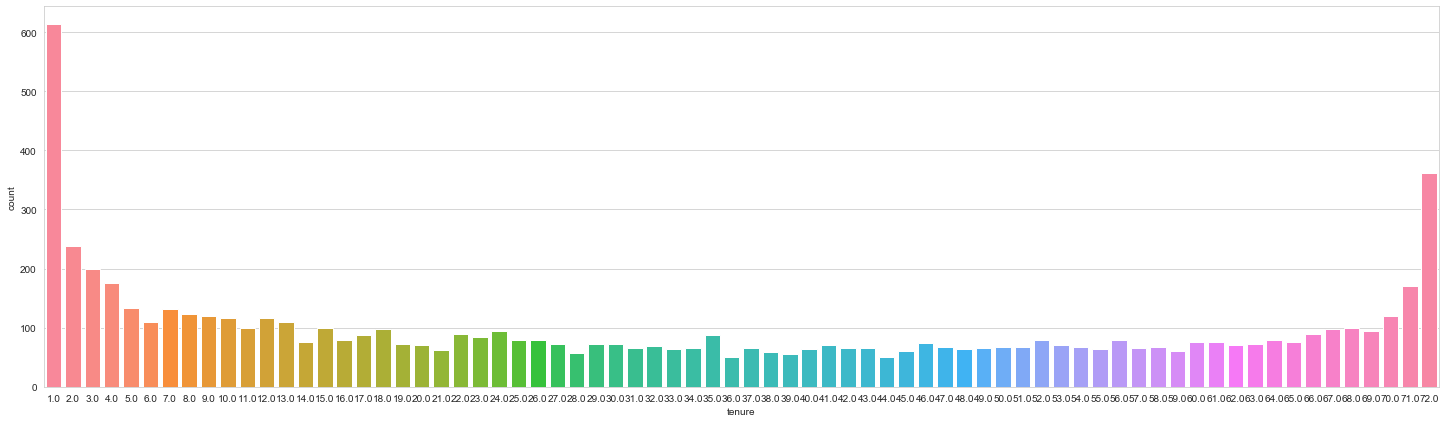

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(25,7))
sns.countplot(x='tenure',data=telcom,saturation=10)

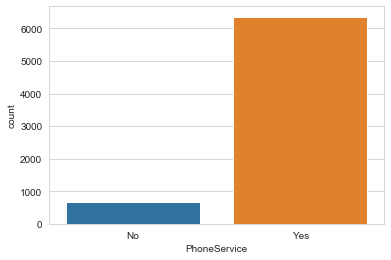

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='PhoneService',data=telcom)

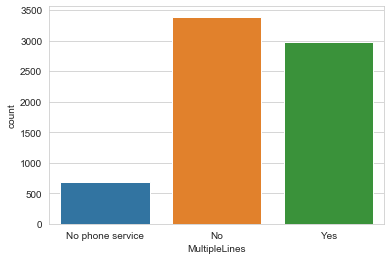

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='MultipleLines',data=telcom)

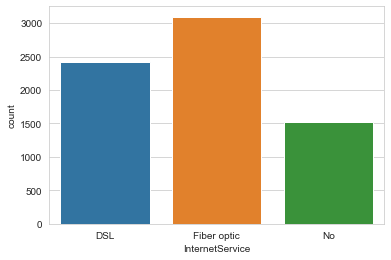

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='InternetService',data=telcom)

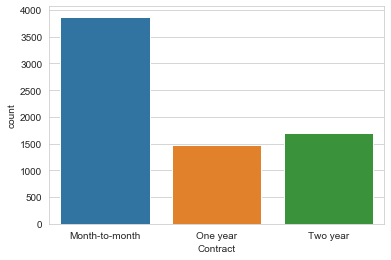

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Contract',data=telcom)

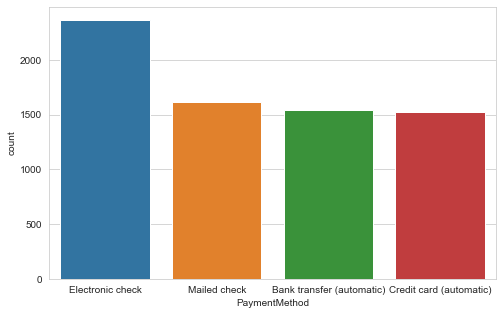

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod',data=telcom)

# Now let's plot variables with respect to target variables

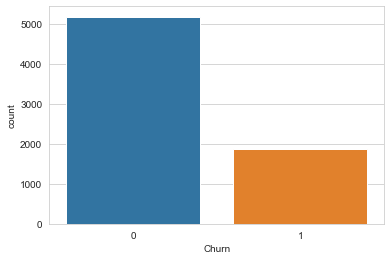

In [29]:
#First let's see our target variable
sns.set_style('whitegrid')
sns.countplot(x='Churn',data=telcom)

Churn      0     1   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


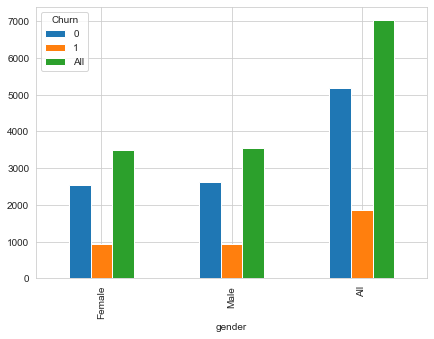

In [30]:
#Gender v/s Churn
print(pd.crosstab(telcom.gender,telcom.Churn,margins=True))
pd.crosstab(telcom.gender,telcom.Churn,margins=True).plot(kind='bar',figsize=(7,5));

In [31]:
#Looking at the ratio
print('percent of females that dropped out {0}'.format((939/1869)*100))
print('percent of males that dropped out {0}'.format((930/1869)*100))

percent of females that dropped out 50.24077046548957
percent of males that dropped out 49.75922953451043


Gender doesn't play an important role because the ratio is almost same.

Churn              0     1   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043


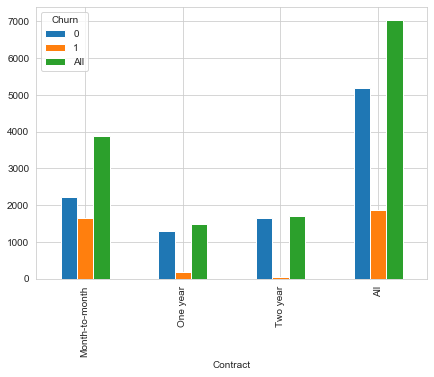

In [32]:
#Contract v/s Churn
print(pd.crosstab(telcom.Contract,telcom.Churn,margins=True))
pd.crosstab(telcom.Contract,telcom.Churn,margins=True).plot(kind='bar',figsize=(7,5));

In [33]:
#Looking at the ratio
print('percent of Month-to-Month contract people that dropped out {0}'.format((1655/1869)*100))
print('percent of One-Year contract people that dropped out {0}'.format((166/1869)*100))
print('percent of Two-Year contract people that dropped out {0}'.format((48/1869)*100))

percent of Month-to-Month contract people that dropped out 88.55002675227395
percent of One-Year contract people that dropped out 8.881754949170679
percent of Two-Year contract people that dropped out 2.568218298555377


Most people that left were the ones who had month to month contract

Churn               0     1   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043


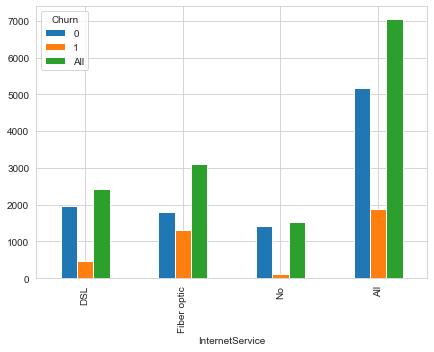

In [34]:
#InternetService v/s Churn
print(pd.crosstab(telcom.InternetService,telcom.Churn,margins=True))
pd.crosstab(telcom.InternetService,telcom.Churn,margins=True).plot(kind='bar',figsize=(7,5));

In [35]:
#Looking at the ratio
print('percent of DSL Internet-Service people that dropped out {0}'.format((459/1869)*100))
print('percent of Fiber Optic Internet-Service people that dropped out {0}'.format((1297/1869)*100))
print('percent of NO Internet-Service people that dropped out {0}'.format((113/1869)*100))

percent of DSL Internet-Service people that dropped out 24.558587479935795
percent of Fiber Optic Internet-Service people that dropped out 69.39539860888175
percent of NO Internet-Service people that dropped out 6.046013911182451


Most people using Fiber Optic dropped out

Churn     0     1   All
row_0                  
29.0   5174  1869  7043
All    5174  1869  7043


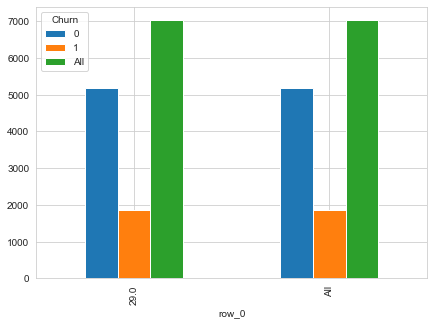

In [36]:
#Tenure Median v/s Churn
print(pd.crosstab(telcom.tenure.median(),telcom.Churn,margins=True))
pd.crosstab(telcom.tenure.median(),telcom.Churn,margins=True).plot(kind='bar',figsize=(7,5));

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043


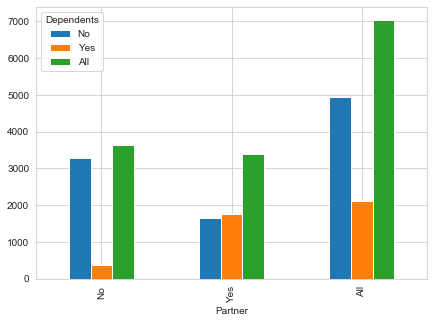

In [37]:
#Partner v/s Dependents
print(pd.crosstab(telcom.Partner,telcom.Dependents,margins=True))
pd.crosstab(telcom.Partner,telcom.Dependents,margins=True).plot(kind='bar',figsize=(7,5));

In [38]:
#Looking at the ratio
print('percent of Partner that had Dependents {0}'.format((1749/2110)*100))
print('percent of Non-Partner that had Dependents {0}'.format((361/2110)*100))

percent of Partner that had Dependents 82.8909952606635
percent of Non-Partner that had Dependents 17.10900473933649


We can see partners have a much larger percent of dependents than non-partner. This tells us that most partners might be married

Churn       0     1   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


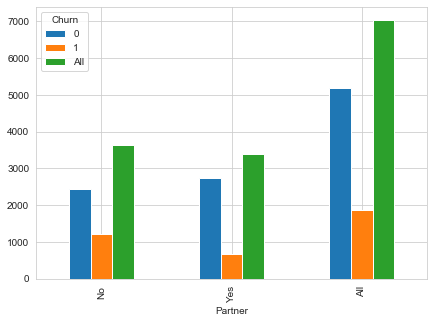

In [39]:
#Partner v/s Churn
print(pd.crosstab(telcom.Partner,telcom.Churn,margins=True))
pd.crosstab(telcom.Partner,telcom.Churn,margins=True).plot(kind='bar',figsize=(7,5));

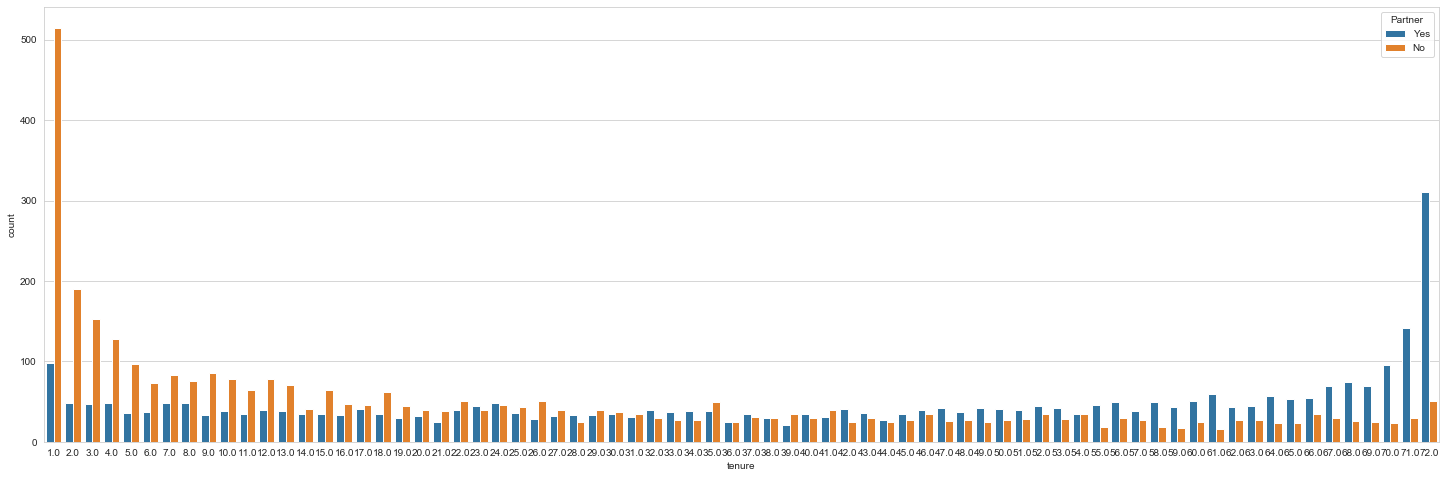

In [40]:
#Impact of Partner on tenure
plt.figure(figsize=(25,8))
sns.countplot(x=telcom['tenure'],hue=telcom.Partner);

Most of the people that were Partner will sty longer with the company. So, being a Partner is a plus-point for the company as they wil stay longer.

Churn       0     1   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


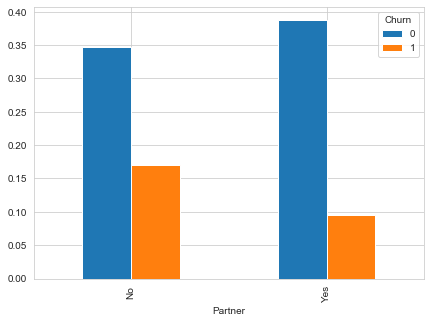

In [41]:
#Partner v/s Churn
print(pd.crosstab(telcom.Partner,telcom.Churn,margins=True))
pd.crosstab(telcom.Partner,telcom.Churn,normalize=True).plot(kind='bar',figsize=(7,5));

Churn             0     1   All
SeniorCitizen                  
No             4508  1393  5901
Yes             666   476  1142
All            5174  1869  7043


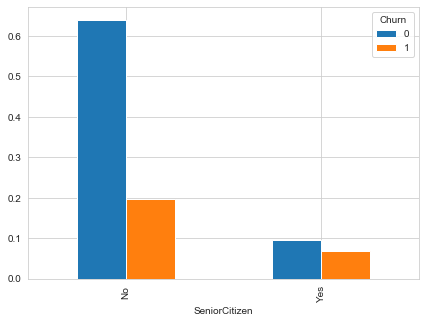

In [42]:
#SeniorCitizen v/s Churn
print(pd.crosstab(telcom.SeniorCitizen,telcom.Churn,margins=True))
pd.crosstab(telcom.SeniorCitizen,telcom.Churn,normalize=True).plot(kind='bar',figsize=(7,5));

# Checking Outliers

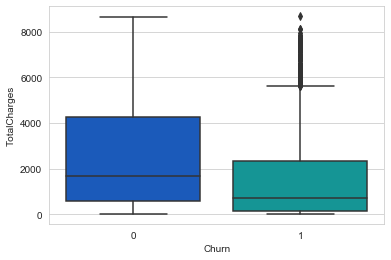

In [43]:
#plt.figure(figsize=(12, 7))
sns.boxplot(x='Churn',y='TotalCharges',data=telcom,palette='winter')

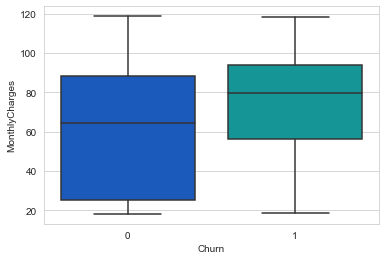

In [44]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=telcom,palette='winter')

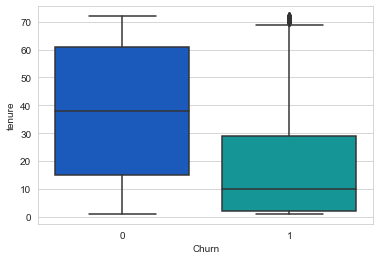

In [45]:
sns.boxplot(x='Churn',y='tenure',data=telcom,palette='winter')

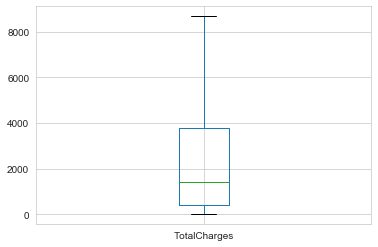

In [46]:
telcom.boxplot('TotalCharges')

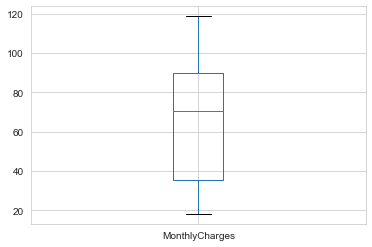

In [47]:
telcom.boxplot('MonthlyCharges')

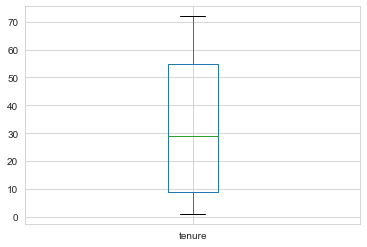

In [48]:
telcom.boxplot('tenure')

### All the numerical variables doesn't have any outliers so we dont have to get into extracting information from outliers

In [20]:
telcom.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7043.000000,7032.000000,7043.000000
mean,32.421786,64.761692,2283.300441,0.265370
std,24.545260,30.090047,2266.771362,0.441561
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64


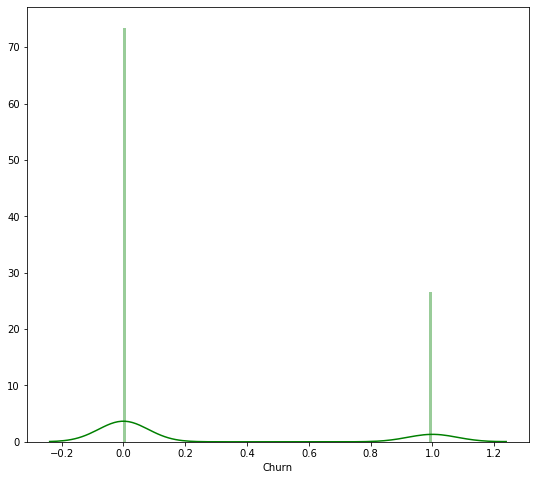

In [21]:
print(telcom['Churn'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(telcom['Churn'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [22]:
telcom_num = telcom.select_dtypes(include = ['float64', 'int64'])
telcom_num.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1.0,29.85,29.85,0
1,34.0,56.95,1889.50,0
2,2.0,53.85,108.15,1
3,45.0,42.30,1840.75,0
4,2.0,70.70,151.65,1


In [23]:
telcom_num.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [24]:
telcom_categ = telcom.select_dtypes(include = ['object'])
telcom_categ.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,7590-VHVEG,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,7795-CFOCW,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,9237-HQITU,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [25]:
telcom_categ.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

# Correlation Matrix

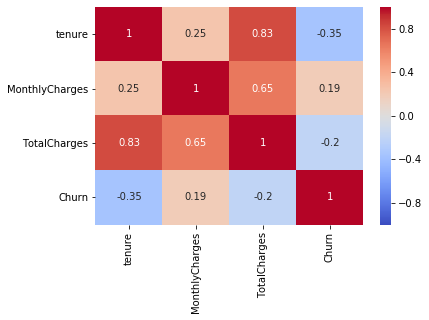

In [31]:
sns.heatmap(telcom.corr(),xticklabels=telcom.corr().columns.values,yticklabels=telcom.corr().columns.values,vmin=-1,cmap='coolwarm',annot=True)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

telcom[['tenure', 'TotalCharges', 'MonthlyCharges']] = scaler.fit_transform(telcom[['tenure', 'TotalCharges','MonthlyCharges']])

In [27]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,0.000000,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,0
1,5575-GNVDE,Male,No,No,No,0.464789,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,0
2,3668-QPYBK,Male,No,No,No,0.014085,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,1
3,7795-CFOCW,Male,No,No,No,0.619718,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,0
4,9237-HQITU,Female,No,No,No,0.014085,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,1


In [28]:
telcom_categ.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [29]:
telcom_categ.drop(["customerID"], axis = 1, inplace = True)

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
telcom_categ.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [31]:
telcom_dummy = pd.get_dummies(telcom_categ)

In [32]:
telcom_dummy.head()

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [33]:
telcom = pd.concat([telcom,telcom_dummy], axis=1)

In [34]:
telcom = telcom.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], axis=1)

In [35]:
telcom.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
  

In [36]:
telcom[['tenure', 'MonthlyCharges', 'TotalCharges']].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [37]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
tenure                                     7032 non-null float64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7032 non-null float64
Churn                                      7043 non-null int64
gender_Female                              7043 non-null uint8
gender_Male                                7043 non-null uint8
SeniorCitizen_No                           7043 non-null uint8
SeniorCitizen_Yes                          7043 non-null uint8
Partner_No                                 7043 non-null uint8
Partner_Yes                                7043 non-null uint8
Dependents_No                              7043 non-null uint8
Dependents_Yes                             7043 non-null uint8
PhoneService_No                            7043 non-null uint8
PhoneService_Yes                           7043 non-null uint8
Multi

In [38]:
telcom.shape

(7043, 41)

In [39]:
telcom.isnull().sum()

tenure                                     11
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
SeniorCitizen_No                            0
SeniorCitizen_Yes                           0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_Yes                

In [40]:
#Dropping null values from total charges and tenure column which contain .15% missing data 
#telcom = telcom.set_index("TotalCharges")
#telcom = telcom.dropna(how='any',axis=0) 
#telcom[~telcom['TotalCharges'].isnull()]
telcom.dropna(inplace=True)

In [41]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 41 columns):
tenure                                     7032 non-null float64
MonthlyCharges                             7032 non-null float64
TotalCharges                               7032 non-null float64
Churn                                      7032 non-null int64
gender_Female                              7032 non-null uint8
gender_Male                                7032 non-null uint8
SeniorCitizen_No                           7032 non-null uint8
SeniorCitizen_Yes                          7032 non-null uint8
Partner_No                                 7032 non-null uint8
Partner_Yes                                7032 non-null uint8
Dependents_No                              7032 non-null uint8
Dependents_Yes                             7032 non-null uint8
PhoneService_No                            7032 non-null uint8
PhoneService_Yes                           7032 non-null uint8
Multi

In [42]:
X = telcom[['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

Y = telcom[['Churn']]

In [43]:
X.shape

(7032, 40)

In [44]:
Y.shape

(7032, 1)

In [45]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25)

model = LogisticRegression()
model.fit(X_train,Y_train)

#model.summary

pred = model.predict(X_test)

print("Model Intercept:", model.intercept_)

print("Model Coefficient:\n", model.coef_)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Intercept: [-0.11671132]
Model Coefficient:
 [[-2.93135981e+00 -1.00419935e-01  8.51349464e-01 -4.50440725e-02
  -7.16672429e-02 -1.68735932e-01  5.20246162e-02 -5.97069454e-02
  -5.70043700e-02  1.32163419e-02 -1.29927657e-01  3.02292183e-02
  -1.46940534e-01 -2.19330865e-01  3.02292183e-02  7.23903311e-02
  -6.72100326e-02  7.71874739e-01 -8.21376022e-01  1.64199566e-01
  -2.80910882e-01 -3.53028411e-02 -8.14084743e-02 -1.14649931e-01
  -2.06138446e-03  9.77459114e-02 -2.14457227e-01 -1.66970174e-01
   5.02588586e-02 -1.96863194e-01  8.01518782e-02  6.77993748e-01
   1.09720473e-02 -8.05677111e-01 -2.51670533e-01  1.34959217e-01
  -1.03781815e-01 -1.63928921e-01  2.47059919e-01 -9.60604991e-02]]
Confusion Matrix:
 [[1156  135]
 [ 223  244]]
Accuracy: 0.7963594994311718


In [46]:
#Random_Forest_Classifier_GINI

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = RandomForestClassifier(criterion='gini',max_depth=3,n_jobs=3,n_estimators=100)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:
 [[1233   58]
 [ 323  144]]
Accuracy: 0.7832764505119454


In [47]:
#Random_Forest_Classifier_GINI

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = RandomForestClassifier(criterion='gini',max_depth=3,n_jobs=3,n_estimators=500)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:
 [[1239   52]
 [ 322  145]]
Accuracy: 0.7872582480091013


In [48]:
#Random_Forest_Classifier_GINI

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = RandomForestClassifier(criterion='gini',max_depth=3,n_jobs=3,n_estimators=1000)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:
 [[1239   52]
 [ 321  146]]
Accuracy: 0.7878270762229806


In [49]:
#Random_Forest_Classifier_GINI

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = RandomForestClassifier(criterion='gini',max_depth=5,n_jobs=5,n_estimators=100)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:
 [[1210   81]
 [ 293  174]]
Accuracy: 0.7872582480091013


In [50]:
#Random_Forest_Classifier_GINI

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = RandomForestClassifier(criterion='gini',max_depth=5,n_jobs=5,n_estimators=500)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:
 [[1203   88]
 [ 282  185]]
Accuracy: 0.7895335608646189


In [51]:
#Random_Forest_Classifier_GINI

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = RandomForestClassifier(criterion='gini',max_depth=5,n_jobs=5,n_estimators=1000)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:
 [[1204   87]
 [ 283  184]]
Accuracy: 0.7895335608646189


In [52]:
#Random_Forest_Classifier_Entropy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = RandomForestClassifier(criterion='entropy',max_depth=3,n_jobs=3,n_estimators=100)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:
 [[1245   46]
 [ 340  127]]
Accuracy: 0.7804323094425484


In [53]:
#Random_Forest_Classifier_Entropy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = RandomForestClassifier(criterion='entropy',max_depth=3,n_jobs=3,n_estimators=500)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:
 [[1237   54]
 [ 317  150]]
Accuracy: 0.7889647326507395


In [54]:
#Random_Forest_Classifier_Entropy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = RandomForestClassifier(criterion='entropy',max_depth=3,n_jobs=3,n_estimators=1000)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:
 [[1241   50]
 [ 328  139]]
Accuracy: 0.7849829351535836


In [55]:
#Random_Forest_Classifier_Entropy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = RandomForestClassifier(criterion='entropy',max_depth=5,n_jobs=5,n_estimators=100)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:
 [[1199   92]
 [ 270  197]]
Accuracy: 0.7940841865756542


In [56]:
#Random_Forest_Classifier_Entropy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = RandomForestClassifier(criterion='entropy',max_depth=5,n_jobs=5,n_estimators=500)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:
 [[1204   87]
 [ 281  186]]
Accuracy: 0.7906712172923777


In [57]:
#Random_Forest_Classifier_Entropy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = RandomForestClassifier(criterion='entropy',max_depth=5,n_jobs=5,n_estimators=1000)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:
 [[1203   88]
 [ 283  184]]
Accuracy: 0.7889647326507395


In [58]:
featuredf = pd.DataFrame()
featuredf['Column'] = X.columns
featuredf['Score'] = model.feature_importances_

In [59]:
featuredf

,Column,Score
0,tenure,0.141861
1,MonthlyCharges,0.066157
2,TotalCharges,0.080363
3,gender_Female,0.001141
4,gender_Male,0.001261
5,SeniorCitizen_No,0.003708
6,SeniorCitizen_Yes,0.003509
7,Partner_No,0.003537
8,Partner_Yes,0.002904
9,Dependents_No,0.004249


In [60]:
featuredf.sort_values('Score', ascending=False)

,Column,Score
31,Contract_Month-to-month,0.209117
0,tenure,0.141861
33,Contract_Two year,0.109637
17,InternetService_Fiber optic,0.098173
2,TotalCharges,0.080363
1,MonthlyCharges,0.066157
38,PaymentMethod_Electronic check,0.051373
18,InternetService_No,0.044925
32,Contract_One year,0.028510
16,InternetService_DSL,0.018311


In [74]:
#Decision_Tree_GINI

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

Confusion Matrix:
 [[1215   76]
 [ 311  156]]
Accuracy: 0.7798634812286689


In [75]:
#Decision_Tree_GINI

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = DecisionTreeClassifier(criterion='gini',max_depth=5)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

Confusion Matrix:
 [[1121  170]
 [ 198  269]]
Accuracy: 0.7906712172923777


In [76]:
#Decision_Tree_GINI

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = DecisionTreeClassifier(criterion='gini',max_depth=7)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

Confusion Matrix:
 [[1164  127]
 [ 237  230]]
Accuracy: 0.7929465301478953


In [78]:
#Decision_Tree_Entropy

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

Confusion Matrix:
 [[1215   76]
 [ 311  156]]
Accuracy: 0.7798634812286689


In [79]:
#Decision_Tree_Entropy

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

Confusion Matrix:
 [[1119  172]
 [ 197  270]]
Accuracy: 0.7901023890784983


In [80]:
#Decision_Tree_Entropy

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25,random_state=1)

model = DecisionTreeClassifier(criterion='entropy',max_depth=7)
model.fit(X_train, Y_train)

pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n",cnf_matrix)

print("Accuracy:", metrics.accuracy_score(Y_test,pred))

Confusion Matrix:
 [[1144  147]
 [ 224  243]]
Accuracy: 0.7889647326507395


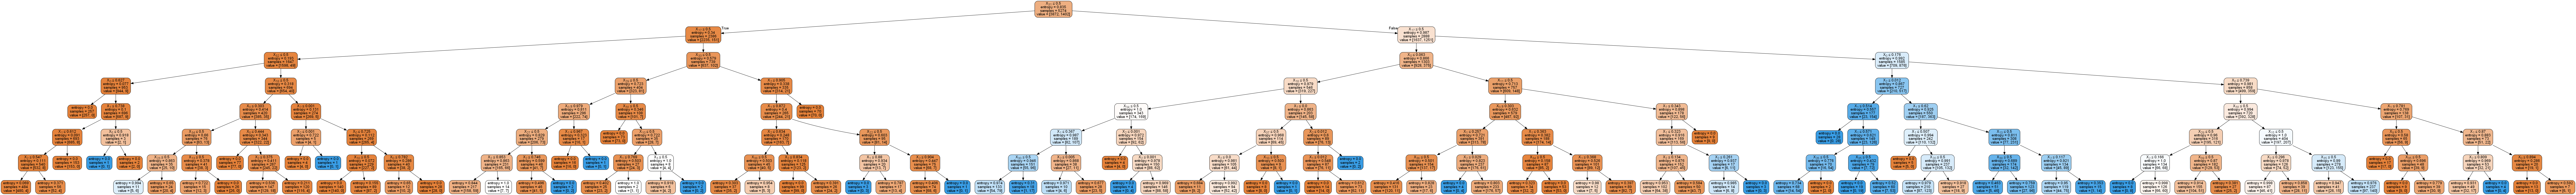

In [79]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
               filled=True, rounded=True,
               special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.set_size('"25,25!"')

Image(graph.create_png())